## Financial Data Analysis and Technical Indicators with Pandas

*[Coding along with [Reinforcement Learning for Algorithmic Trading with Python](https://www.udemy.com/course/reinforcement-learning-for-algorithmic-trading-with-python/), an Udemy online course by Alexander Hagmann]*

### Loading and Inspecting the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

__Example dataset__: Forex Pair EUR/USD, hourly data (1h candles) incl. some technical indicators (signals)

__Forex Pair EUR/USD__: the Price of 1 EUR in USD (e.g. 1.082603 USD per 1 EUR)

__Open__: Price at the beginning of the 1h bar <br>
__High__: Highest Price in the 1h bar<br>
__Low__: Lowest Price in the 1h bar<br>
__Close__: Last Price in the 1h bar<br>

In [2]:
data_file = "../assets/data/fin_data.csv"

In [3]:
df = pd.read_csv(data_file, index_col = "Datetime")
df

,Open,High,Low,Close,Adj Close,Volume,SMA_ratio,MACD_hist,RSI,SO_diff,returns
Datetime,,,,,,,,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744,1.015744,0,1.010741,-0.000011,54.977630,16.843137,0.000914
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880,1.016880,0,1.010875,0.000113,66.968203,7.167459,0.001119
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226,1.018226,0,1.010958,0.000261,68.519030,0.000000,0.001324
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019,1.018019,0,1.011022,0.000316,69.576672,-8.512356,-0.000204
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016,1.004016,0,1.010920,-0.000571,28.876104,-61.516603,-0.013755
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082720,1.082837,1.082251,1.082485,1.082485,0,0.997683,-0.000161,32.924687,-1.561545,-0.000325
2024-07-29 19:00:00+00:00,1.082603,1.082837,1.082603,1.082603,1.082603,0,0.997667,-0.000100,34.565767,-0.206691,0.000108
2024-07-29 20:00:00+00:00,1.082603,1.082603,1.082251,1.082368,1.082368,0,0.997655,-0.000064,23.563915,-0.508117,-0.000216


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11619 entries, 2022-09-13 08:00:00+00:00 to 2024-07-29 22:00:00+00:00
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       11619 non-null  float64
 1   High       11619 non-null  float64
 2   Low        11619 non-null  float64
 3   Close      11619 non-null  float64
 4   Adj Close  11619 non-null  float64
 5   Volume     11619 non-null  int64  
 6   SMA_ratio  11619 non-null  float64
 7   MACD_hist  11619 non-null  float64
 8   RSI        11619 non-null  float64
 9   SO_diff    11619 non-null  float64
 10  returns    11619 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.1+ MB


In [5]:
df.shape

(11619, 11)

In [6]:
# converting the index to datetime
df.index = pd.to_datetime(df.index)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11619 entries, 2022-09-13 08:00:00+00:00 to 2024-07-29 22:00:00+00:00
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       11619 non-null  float64
 1   High       11619 non-null  float64
 2   Low        11619 non-null  float64
 3   Close      11619 non-null  float64
 4   Adj Close  11619 non-null  float64
 5   Volume     11619 non-null  int64  
 6   SMA_ratio  11619 non-null  float64
 7   MACD_hist  11619 non-null  float64
 8   RSI        11619 non-null  float64
 9   SO_diff    11619 non-null  float64
 10  returns    11619 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.1 MB


In [8]:
# selecting the timestamps in march 2024 and only the close column
# pandas.DataFrame.loc @ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
# Access a group of rows and columns by label(s) or a boolean array.
# .loc[] is primarily label based, but may also be used with a boolean array.
df.loc["2024-03", "Close"]

Datetime
2024-03-01 00:00:00+00:00    1.081432
2024-03-01 01:00:00+00:00    1.082368
2024-03-01 02:00:00+00:00    1.082251
2024-03-01 03:00:00+00:00    1.082017
2024-03-01 04:00:00+00:00    1.081666
                               ...   
2024-03-29 18:00:00+00:00    1.079214
2024-03-29 19:00:00+00:00    1.079331
2024-03-29 20:00:00+00:00    1.079680
2024-03-29 21:00:00+00:00    1.079680
2024-03-31 23:00:00+00:00    1.079564
Name: Close, Length: 498, dtype: float64

In [9]:
# df.describe() -> Descriptive statistics include those that summarize the central tendency, dispersion 
# and shape of a dataset's distribution, excluding NaN values.
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SMA_ratio,MACD_hist,RSI,SO_diff,returns
count,11619.000000,11619.000000,11619.000000,11619.000000,11619.000000,11619.0,11619.000000,1.161900e+04,11619.000000,11619.000000,11619.000000
mean,1.071194,1.071845,1.070578,1.071201,1.071201,0.0,1.000543,-6.733277e-07,50.447877,-0.002157,0.000006
std,0.030847,0.030703,0.030982,0.030846,0.030846,0.0,0.005715,3.657153e-04,15.215265,12.713664,0.001044
min,0.954745,0.956389,0.954107,0.954290,0.954290,0.0,0.977415,-2.332313e-03,6.970633,-61.516603,-0.013854
25%,1.064509,1.065190,1.063830,1.064509,1.064509,0.0,0.996962,-1.835453e-04,39.750742,-6.267926,-0.000427
50%,1.078865,1.079447,1.078400,1.078865,1.078865,0.0,1.000283,4.779292e-06,50.788144,0.000000,0.000000
75%,1.089325,1.089800,1.088850,1.089325,1.089325,0.0,1.003736,1.985711e-04,61.519055,6.322095,0.000429
max,1.125999,1.127777,1.125366,1.126126,1.126126,0.0,1.026594,2.289056e-03,95.205582,58.361615,0.017620


### Prices and Financial Returns

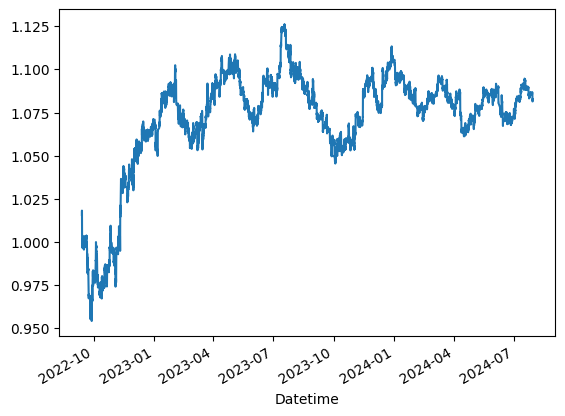

In [10]:
# plotting the close price over time
df.Close.plot() # plotting 'Series' object
plt.show()

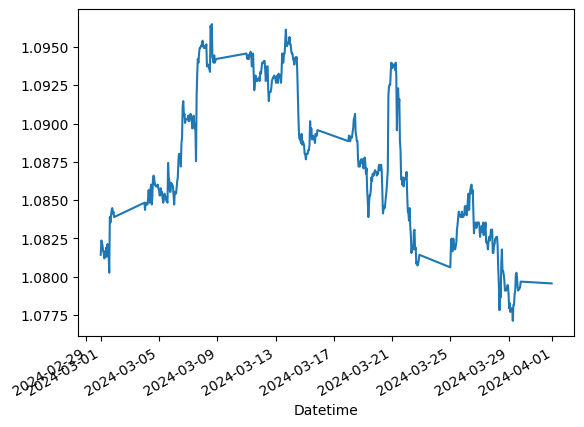

In [11]:
# zooming in and selecting only 1 month
df.loc["2024-03", "Close"].plot()
plt.show()

In [12]:
# converting the finacial data into returns
# most recent [1] hourly Return(s)
# calculated as percentage change in Price from previous [1h] bar to this [1h] bar (based on Close Price)
df.returns

Datetime
2022-09-13 08:00:00+00:00    0.000914
2022-09-13 09:00:00+00:00    0.001119
2022-09-13 10:00:00+00:00    0.001324
2022-09-13 11:00:00+00:00   -0.000204
2022-09-13 12:00:00+00:00   -0.013755
                               ...   
2024-07-29 18:00:00+00:00   -0.000325
2024-07-29 19:00:00+00:00    0.000108
2024-07-29 20:00:00+00:00   -0.000216
2024-07-29 21:00:00+00:00    0.000217
2024-07-29 22:00:00+00:00    0.000000
Name: returns, Length: 11619, dtype: float64

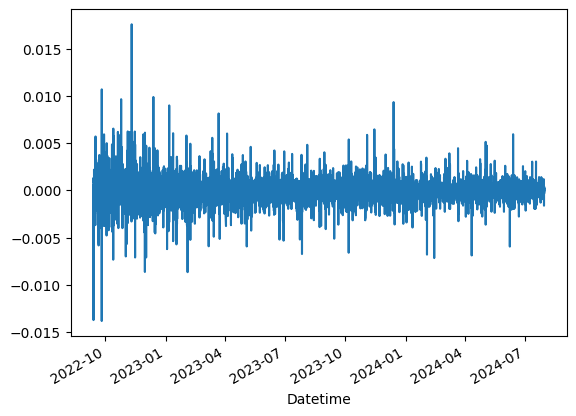

In [13]:
df.returns.plot() # visualizing the hourly returns over time
plt.show()

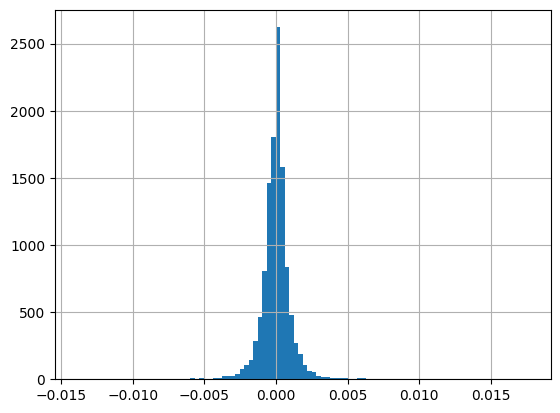

In [14]:
# visualizing returns in a histogram
# might make sense because there are some outliers in the plot above
df.returns.hist(bins = 100)
plt.show()

__Pros and Cons of using most recent returns as trading signals:__

- Captures short-term price momentum, which is essential for making timely trading decisions.
- Directly reflects the market's immediate movement, helping the agent react to sudden changes.
- On its own, the most recent return can be noisy and may lead to overtrading if not used carefully.
- It’s a very short-term measure and doesn’t provide information about the broader trend.
- This is a useful feature, especially when combined with longer-term indicators to balance out the noise.

## Technical Indicators

### Simple Moving Averages (SMA ratio (200 / 50))

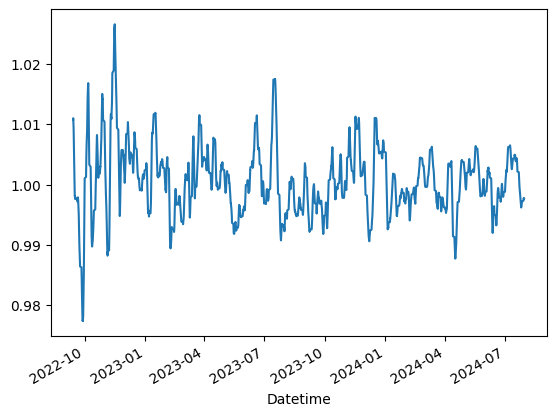

In [15]:
df.SMA_ratio.plot() # plotting SMA200/SMA50 ratio over time (timeseries)
plt.show()

- SMA 200/50 is the average price over the last 200 bars (in our case hours)
 
- Typically traders work with a longer SMA and a shorter SMA: the ratio of long-term (SMA 200) to short-term (SMA 50) moving averages is a classic trend-following indicator.
 
- We're dividing the longer SMA by the shorter one (ratio (200 / 50)). If the ratio is greater than 1 (SMA 50 below SMA 200), it typically suggests a bearish trend (sell and going short); when less than 1, a bullish trend (going long).

- Advantage: it smooths out price data, reducing the impact of short-term volatility.

- Disadvantage: Moving averages can lag, potentially causing the agent to react late to market reversals.

- The choice of SMA periods (200 and 50 hours) is somewhat arbitrary and might not be optimal for the hourly data.

- This feature is valuable, but consider experimenting with different SMA periods or incorporating an **exponential moving average (EMA)** to reduce lag.

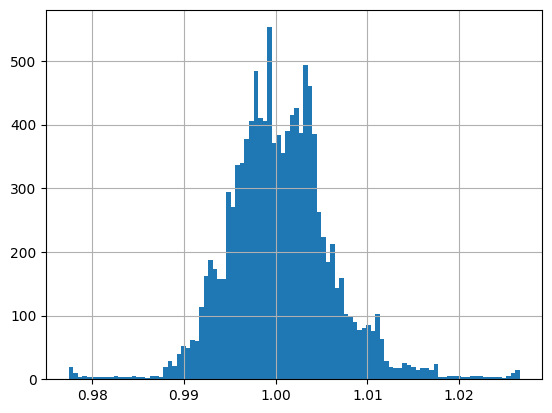

In [16]:
# plotting histogram instead of time series
df.SMA_ratio.hist(bins=100)
plt.show()

### MACD (moving average convergence/divergence)

__MACD Histogram (Difference between the MACD Line and the MACD Signal Line__

- The MACD (moving average convergence/divergence) is a momentum indicator that can signal trend reversals, making it useful for detecting changes in market direction.
- The difference between the MACD line and the signal line (often called the "MACD Histogram") is a widely used feature to capture the strength of a trend.
- Like moving averages, the MACD can be lagging, potentially delaying responses to rapid market changes.
- The MACD is based on EMAs, which can be sensitive to recent price changes, leading to potential false signals in highly volatile markets.
- The MACD Histogram is a strong feature, especially in conjunction with other indicators that account for different market conditions.

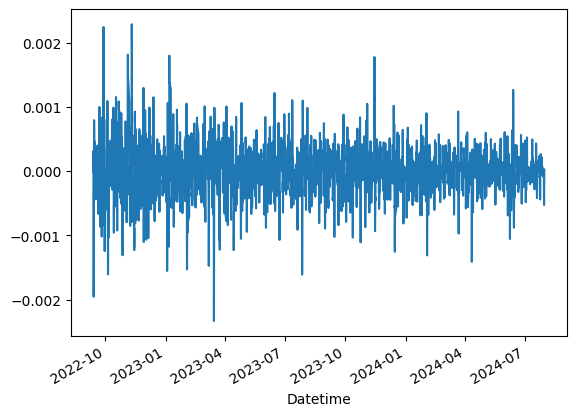

In [17]:
df.MACD_hist.plot()
plt.show()

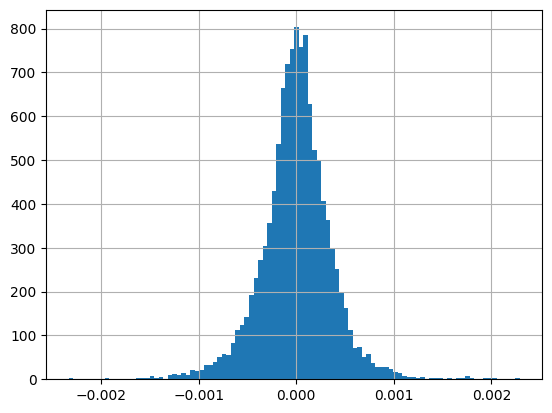

In [18]:
df.MACD_hist.hist(bins = 100)
plt.show()

 ### RSI (Relative Strength Index)

__RSI (Relative Strength Index)__

- Extreme __high RSI__ (>70) indicates overbought instrument -> __sell__
- Extreme __low RSI__ (<30) indicates oversold instrument -> __buy__
- 
- RSI is a momentum oscillator that measures the speed and change of price movements, helping to identify overbought or oversold conditions.
- It can be effective in ranging markets, indicating potential reversals when the market is overextended.
- RSI may produce false signals in trending markets, where it can stay overbought or oversold for extended periods.
- It’s a bounded indicator (0 to 100), which might limit its effectiveness in some market conditions.
- RSI is a useful feature, but its signals should be interpreted with caution in strong trends. Consider combining it with trend indicators like SMA to filter out false signals.

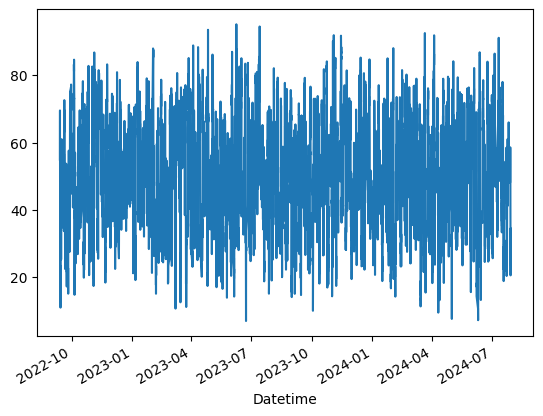

In [19]:
df.RSI.plot()
plt.show()

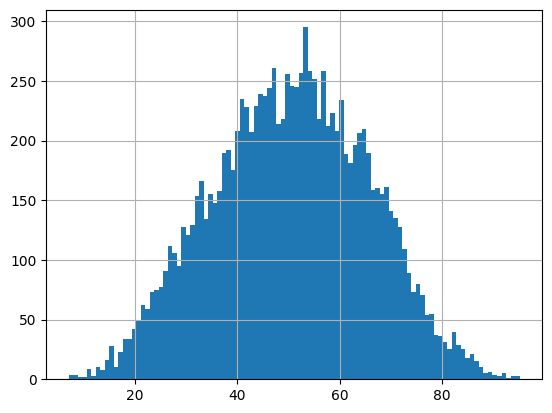

In [20]:
df.RSI.hist(bins = 100)
plt.show()

### Stochastic Oscillator

__Stochastic Oscillator (%K minus %D)__

- The Stochastic Oscillator is another momentum indicator, comparing a particular closing price to a range of its prices over a certain period.
- The difference between the %K and %D lines (fast and slow stochastic) can signal potential reversals and is useful in identifying overbought/oversold conditions.
- Like RSI, the Stochastic Oscillator can give false signals in trending markets.
- It’s also a bounded indicator and can be less effective during periods of strong directional movement.
- Similar to the RSI, this is a valuable feature for identifying potential turning points, especially in non-trending markets. Use it alongside trend-following indicators to enhance its reliability.

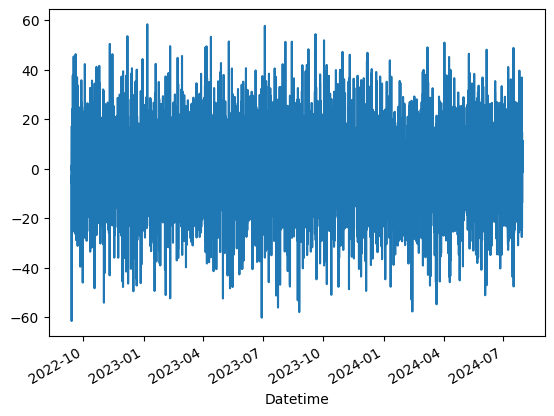

In [21]:
df.SO_diff.plot()
plt.show()

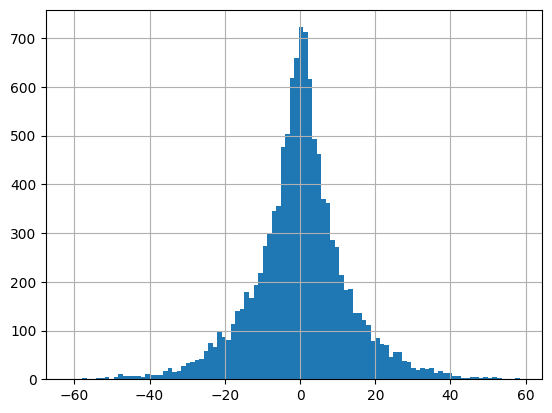

In [22]:
df.SO_diff.hist(bins = 100)
plt.show()

In [23]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_ratio,MACD_hist,RSI,SO_diff,returns
Datetime,,,,,,,,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744,1.015744,0,1.010741,-0.000011,54.977630,16.843137,0.000914
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880,1.016880,0,1.010875,0.000113,66.968203,7.167459,0.001119
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226,1.018226,0,1.010958,0.000261,68.519030,0.000000,0.001324
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019,1.018019,0,1.011022,0.000316,69.576672,-8.512356,-0.000204
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016,1.004016,0,1.010920,-0.000571,28.876104,-61.516603,-0.013755
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082720,1.082837,1.082251,1.082485,1.082485,0,0.997683,-0.000161,32.924687,-1.561545,-0.000325
2024-07-29 19:00:00+00:00,1.082603,1.082837,1.082603,1.082603,1.082603,0,0.997667,-0.000100,34.565767,-0.206691,0.000108
2024-07-29 20:00:00+00:00,1.082603,1.082603,1.082251,1.082368,1.082368,0,0.997655,-0.000064,23.563915,-0.508117,-0.000216


Your selected features provide a well-rounded view of market conditions, combining momentum (hourly return, MACD), trend-following (SMA ratio), and mean-reversion indicators (RSI, Stochastic Oscillator). This diversity is beneficial as it allows your reinforcement learning agent to capture different market dynamics.

However, there are a few considerations to keep in mind:

Complementary Features: While these features cover different aspects of market behavior, they are all technical indicators based on price. You might want to consider adding features that incorporate volume data, if available, or other non-price-based indicators (e.g., volatility measures) to add further depth to your state space.

Correlation: Some of these indicators might be correlated (e.g., RSI and Stochastic), which could lead to redundancy in the feature set. It might be worthwhile to analyze the correlations between these features and possibly reduce the feature set if they provide overlapping information.

Feature Scaling: Ensure that all features are appropriately scaled, as some (like SMA ratios or MACD differences) could have vastly different ranges compared to bounded oscillators like RSI and Stochastic.

Dynamic Market Adaptation: Markets change over time, and fixed indicators might not always perform well across all conditions. Consider periodic retraining or feature recalibration to adapt to new market conditions.

In summary, your approach to feature engineering is solid, with a good mix of indicators that should provide a comprehensive state representation for your reinforcement learning agent. Minor adjustments, such as feature correlation analysis and consideration of additional data sources, could further enhance the robustness of your trading model.

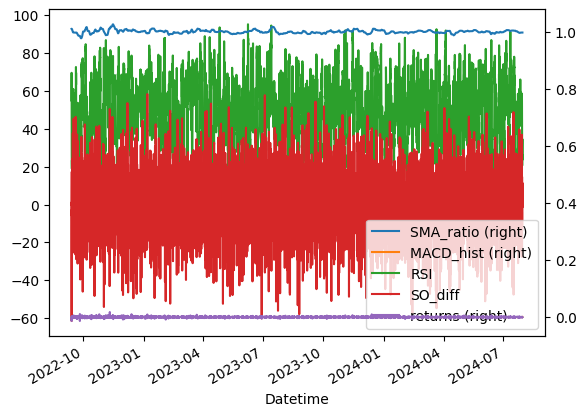

In [24]:
df[["SMA_ratio", "MACD_hist", "RSI", "SO_diff", "returns"]].plot(secondary_y = ["SMA_ratio", "MACD_hist", "returns"])
plt.show()

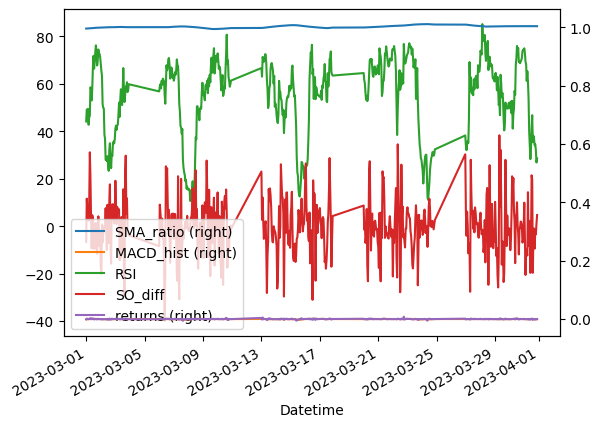

In [25]:
df.loc["2023-03", ["SMA_ratio", "MACD_hist", "RSI", "SO_diff", "returns"]].plot(secondary_y = ["SMA_ratio", "MACD_hist", "returns"])
plt.show()

__The Goal in (Algo) Trading is to__
- __go long EUR__ (buy EUR with USD) when EUR appreciates in value relative to USD.
- __go short EUR__ (buy USD with EUR) when EUR depreciates in value relative to USD.
- __go/stay neutral__ ("do nothing") if prices remain stable or when signals are not clear

-> taking all 3 trading positions (short, long, neutral) can easily be done with derivatives (CFDs, Futures).

A capable __Reinforcement Learning Agent for Trading__ should be able to... 
- identify states (combinations of indicators) that will more likely lead to falling/rising prices
- identify the right sequence of actions (go long, neutral, short) to maximize profits
- take into account trading costs and other user-defined features